In [103]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Задание

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Этапы работы:

<br>Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
<br>Проведите первичный анализ.
<br>Проверьте данные на пропуски. Удалите в случае обнаружения.
<br>Предложите альтернативный способ работы с пропусками
<br>Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно <br>сделать вывод об особенностях датасета/класса/признака)
<br>Преобразуйте категориальные признаки.
<br>Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
<br>Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
<br>Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для <br>этого используйте встроенную функцию score.
<br>Сформулируйте выводы по проделанной работе.
<br>Кратко опишите какие преобразования были сделаны с данными.
<br>Сравните точность двух моделей.
<br>Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. 
<br>*Что по вашему мнению нужно сделать, чтобы улучшить результат ?
<br>Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

# Импортируем датасет с github

In [104]:
url = r'https://raw.githubusercontent.com/miracurue/Adult_project/main/adult.csv'
#url = r"D:\КУРСЫ\НЕТОЛОГИЯ\МАШИННОЕ ОБУЧЕНИЕ\1\Лекция_2\Лекция_2\adult.csv"

In [105]:
df = pd.read_csv(url, sep=',')

In [106]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [107]:
# Как соответсвуют друг другу educational-num и education. 

df.value_counts(['educational-num', 'education']).sort_index()

educational-num  education   
1                Preschool          83
2                1st-4th           247
3                5th-6th           509
4                7th-8th           955
5                9th               756
6                10th             1389
7                11th             1812
8                12th              657
9                HS-grad         15784
10               Some-college    10878
11               Assoc-voc        2061
12               Assoc-acdm       1601
13               Bachelors        8025
14               Masters          2657
15               Prof-school       834
16               Doctorate         594
dtype: int64

In [108]:
df.shape

(48842, 15)

# Пропуски

Пропущенные данные есть в колонках native-country, occupation и workclass, там они заполнены символом "?".
В колонках capital-gain и capital-loss много нулей: пока не понятно, это пропуски заполнены нулями или это какое-то смысловое значение.

Создадим датафрейм с пропущенными значениями  в 'occupation' и 'workclass'
Пропуски по этим колонкам находятся почти в одних и тех же строках (подавляющее большинство пересекается)

In [109]:
df2 = df[(df['occupation']=='?')|(df['workclass']=='?')].copy()

Заполним пропуски значеним None

In [110]:
df = df.replace('?', None)

# Сравним визуально распределения в двух таблицах. 
Посмотрим, какое распределение имеют значения в полном датасете df и в таблице с пропущенными значениями (df2), чтобы убедиться в случайности пропусков.

In [111]:
# оставим для построения графиков только колонки с категориальными данными, исключим колонки с пропущенными данными:
# workclass и occupation, а так же исключим колонки capital-gain и capital-loss.

columns = ['age', 'education',
       'marital-status', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country']

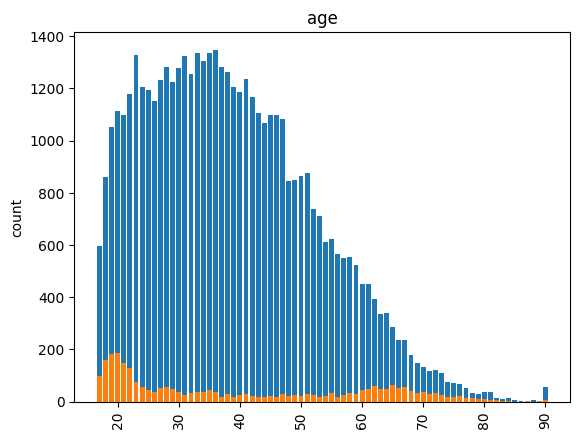

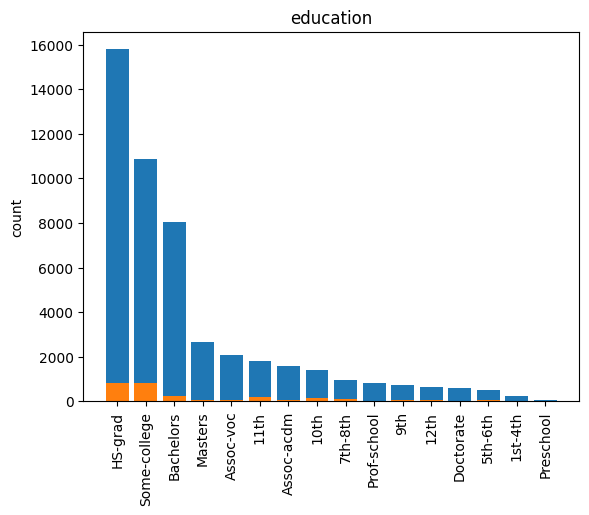

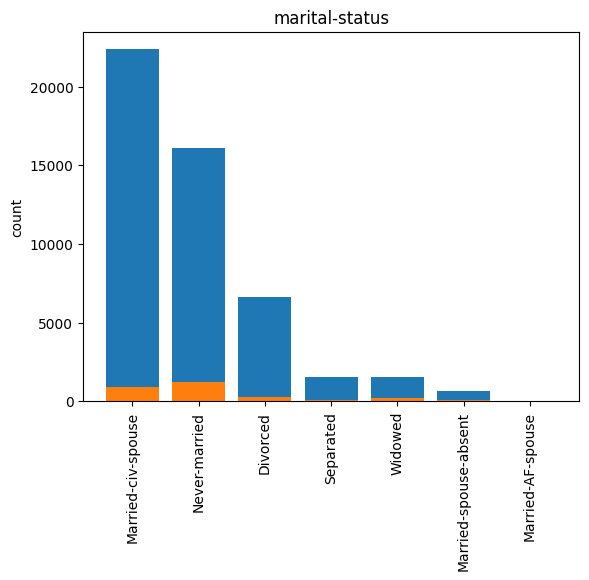

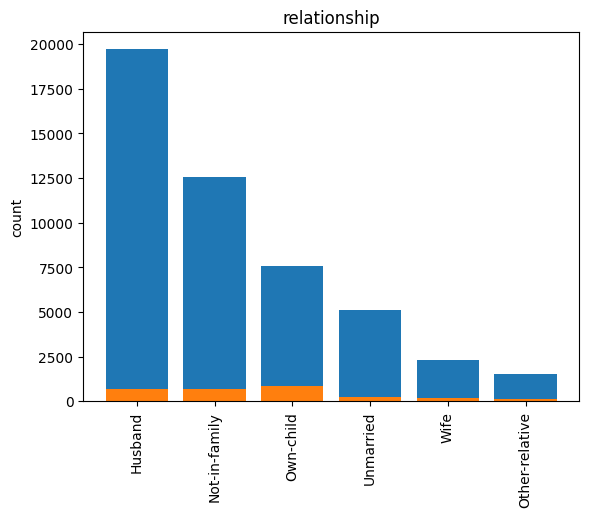

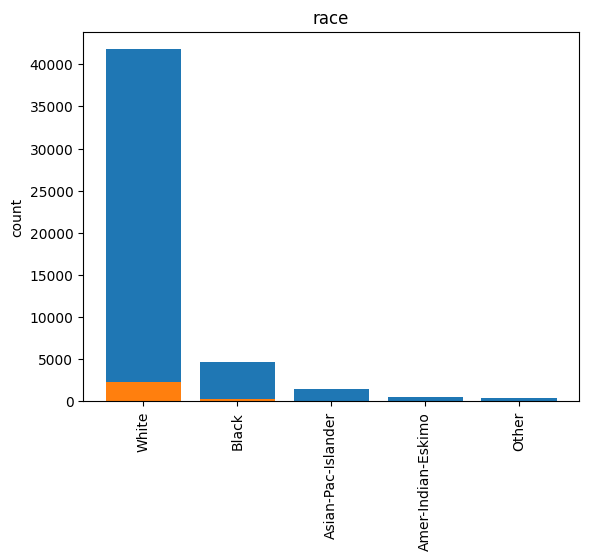

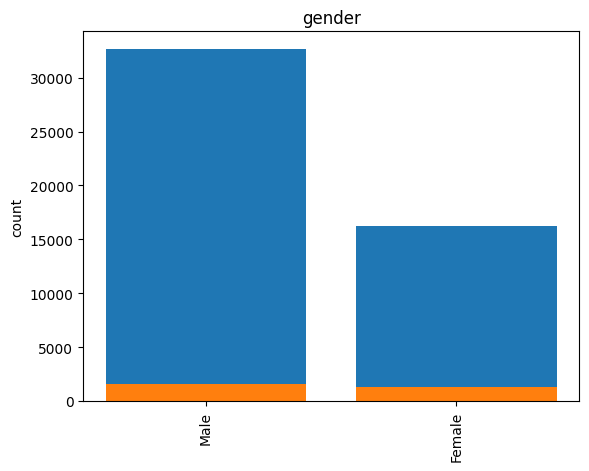

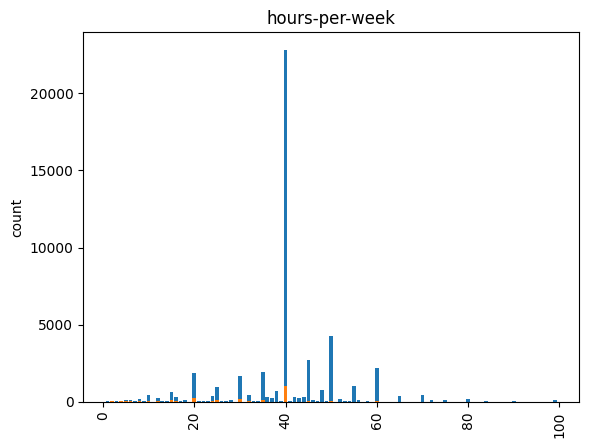

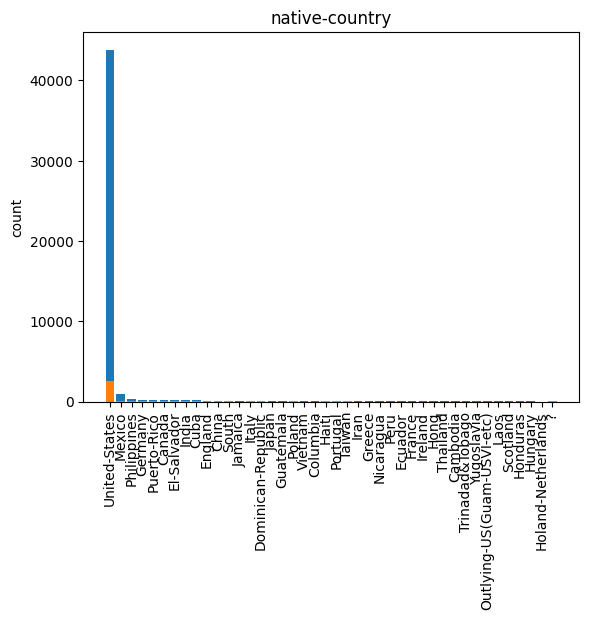

In [112]:
# Напишем цикл, чтобы посмотреть графики сразу по всем колонкам

for column in columns:

    # в переменные x и x2 поместим уникальные значения каждой колонки,
    # а в y и y2 - их количество

    x = df[column].value_counts().index
    y = df[column].value_counts().values
    x2 = df2[column].value_counts().index
    y2 = df2[column].value_counts().values

    fig, ax = plt.subplots()
    plt.bar(x=x, height=y)
    plt.bar(x=x2, height=y2)

    plt.ylabel('count')
    plt.title(column)

    plt.xticks(rotation=90)

    plt.show()

Вывод: пропуски, скорее всего, случайны. По графикам невозможно однозначно сказать, что в пропусках есть зависимость (на первом графике какое-то неоднозначное распределение, но я буду пока исходить из того, что пропуски случайны).

Подготовим столбец с целевой переменной

In [113]:
targ_dict = {'<=50K': 0, '>50K':1}
df['income'] = df['income'].replace(targ_dict)

Посмотрим, как распределены зарплаты в зависимости от возраста и образования

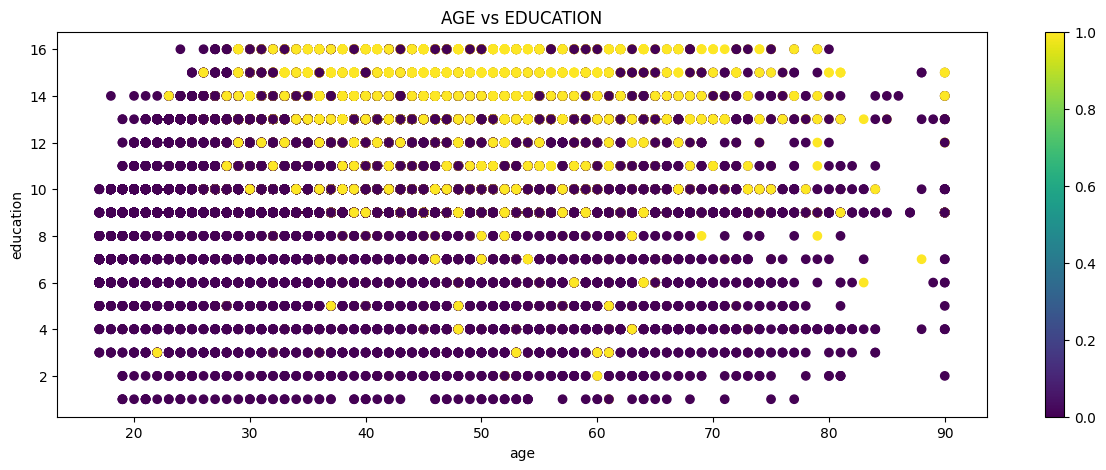

In [114]:
x_fig = df['age']
y_fig = df['educational-num']
z_fig = df['income']
plt.figure(figsize=(15, 5))
plt.scatter(x=x_fig, y=y_fig, c=z_fig)
plt.colorbar()
plt.title('AGE vs EDUCATION')
plt.xlabel('age')
plt.ylabel('education')
plt.show()

# Преобразуем категориальные признаки

In [115]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [116]:
# удалим целевую колонку income, fnlwgt (честно, не поняла, что это), education - потому что есть аналог, трансформированный 
# в порядковые числа educational-num

df_without_col = df.drop(['income', 'fnlwgt', 'education'], axis=1)

In [117]:
# в преобразованных данных первую колонку удаляем

df_encoded = pd.get_dummies(df_without_col, columns=['workclass',
       'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)

In [118]:
df_encoded.head(1)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Произведем масштабирование данных

In [119]:
scaler = MinMaxScaler()
df_encoded_norm = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [120]:
df_encoded_norm.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.013699,0.600000,0.000000,0.0,0.295918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Решение 1 с удаленными пропусками


## МОДЕЛЬ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Удалим пропуски и обучим модель без них.

In [121]:
df_encoded_norm = df_encoded_norm.dropna(how='any', axis=0)

In [122]:
df_encoded_norm.shape

(48842, 81)

Построим модель логистической регрессии

In [123]:
# Разобьем данные на две группы: тренировочную и тестовую

X = df_encoded_norm
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Обучим модель логистической регрессии

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [124]:
# Проверим точность предсказания

score = model.score(X_test, y_test)
score

0.8550516941345071

Сравним результаты с обученной моделью на данных без масштабирования

In [125]:
X = df_encoded
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8554611526256526

Без масштабирования точность даже немного выше

## МЕТОД ОПОРНЫХ ВЕКТОРОВ

In [126]:
X = df_encoded_norm
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_ = SVC(kernel='poly')
model_.fit(X_train, y_train)

SVC(kernel='poly')

In [127]:
model_.score(X_train, y_train)

0.8474394082870524

In [128]:
model_.score(X_test, y_test)

0.8512642030914116

Точность на тренировочных данных примерно такая же, как на тестовых, и как у логистической регрессии

# Решение 2 с пропусками, заполненными модой

## МОДЕЛЬ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Заполним пропуски модой

In [129]:
df_without_col_2 = df_without_col.copy()

In [130]:
# Столбцы с пропусками

df_without_col_2[['native-country', 'occupation', 'workclass']].head()

,native-country,occupation,workclass
0,United-States,Machine-op-inspct,Private
1,United-States,Farming-fishing,Private
2,United-States,Protective-serv,Local-gov
3,United-States,Machine-op-inspct,Private
4,United-States,None,None


In [131]:
# Самое часто встречающееся значение в этом столбце - 'United-States', для проверки посмотрим его количество до и после заполнения пропусков

df_without_col_2['native-country'].value_counts()[0]

43832

In [132]:
# Заполняем модой пропуски в трех колонках

for col in df_without_col_2[['native-country', 'occupation', 'workclass']]:

    mode = df_without_col_2[col].mode()[0]
    df_without_col_2[col].fillna(mode, inplace=True)


In [133]:
# Все в порядке, пропуски заполнены

df_without_col_2['native-country'].value_counts()[0]

44689

Обучим модель логистической регрессии

In [134]:
# в преобразованных данных первую колонку удаляем

df_encoded = pd.get_dummies(df_without_col_2, columns=['workclass',
       'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)

# масштабируем данные

scaler = MinMaxScaler()
df_encoded_norm = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Разобьем данные на две группы: тренировочную и тестовую

X = df_encoded_norm
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Обучим модель логистической регрессии

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Проверим точность предсказания

score = model.score(X_test, y_test)
score

0.8559729757395844

Точность у этой модели чуть выше, чем у предыдущей, с удаленными пропусками и масштабированными данными

## МЕТОД ОПОРНЫХ ВЕКТОРОВ

In [135]:
X = df_encoded_norm
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_ = SVC(kernel='poly')
model_.fit(X_train, y_train)


SVC(kernel='poly')

In [136]:
model_.score(X_train, y_train)


0.8506129552376321

In [137]:
model_.score(X_test, y_test)

0.853618589415498

На данных с заполненными пропусками метод опорных векторов тоже показал себя немного хуже, чем в других вариантах

Вывод: для обучения моделей логистической регрессии и SVC категориальные данные были преобразованы методом создания фиктивных переменных (get_dummies()), для того чтобы создать столбцы для каждой категории и заполнить их бинарными значениями. Порядковые значения ('education') были заменены на порядковые числа. Далее данные были масштабированы с помощью MinMaxScaler(), чтобы избавиться от большого разброса значений.

Были обучены модели логистической регрессии и SVC. Они показали примерно одинаковые результаты на масштабированных данных и немасштабированных, на данных с удаленными пропусками и пропусками заполненными модой.

Точность (accuracy) полученных предскзаний составила во всех случаях примерно 0,855, что является хорошим результатом.